## 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## pygot and graphviz 

## 2. Import datasets

In [2]:
pneumonia_dataset = np.load('../Datasets/pneumoniamnist.npz')
print("Get object keys", pd.DataFrame(pneumonia_dataset).head())

Get object keys               0
0  train_images
1    val_images
2   test_images
3  train_labels
4    val_labels


## 3. Get images and labels

In [3]:
train_images = pneumonia_dataset['train_images']
print("train_images dimensions", np.shape(train_images))
val_images = pneumonia_dataset['val_images']
print("val_images dimensions", np.shape(val_images))
test_images = pneumonia_dataset['test_images']
print("test_images dimensions", np.shape(test_images))
train_labels = pneumonia_dataset['train_labels']
print("train_labels dimensions", np.shape(train_labels))
val_labels = pneumonia_dataset['val_labels']
print("val_labels dimensions", np.shape(val_labels))
test_labels = pneumonia_dataset['test_labels']
print("test_labels dimensions", np.shape(test_labels))


train_images dimensions (4708, 28, 28)
val_images dimensions (524, 28, 28)
test_images dimensions (624, 28, 28)
train_labels dimensions (4708, 1)
val_labels dimensions (524, 1)
test_labels dimensions (624, 1)


## 4. Display a image from the dataset

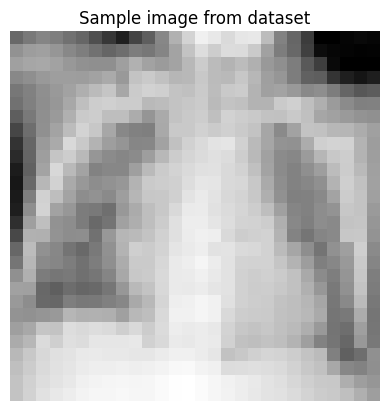

In [4]:
sample_image = train_images[0]
plt.imshow(sample_image, cmap="gray")
plt.axis("off")
plt.title("Sample image from dataset")
plt.show()

## 5. Convert image data from integers to floating point numbers

In [5]:
train_images = train_images / 255.0
print("New dataset format using floating point numbers", train_images)
val_images = val_images / 255.0

test_images = test_images / 255.0

New dataset format using floating point numbers [[[0.36078431 0.42352941 0.45882353 ... 0.01960784 0.03137255 0.02352941]
  [0.50588235 0.54117647 0.55294118 ... 0.01568627 0.00784314 0.01176471]
  [0.55294118 0.57254902 0.58039216 ... 0.         0.         0.        ]
  ...
  [0.65882353 0.70588235 0.75294118 ... 0.46666667 0.45098039 0.49411765]
  [0.67843137 0.72156863 0.76470588 ... 0.6        0.54509804 0.51764706]
  [0.67843137 0.7254902  0.77647059 ... 0.65882353 0.60392157 0.54509804]]

 [[0.45098039 0.4627451  0.45882353 ... 0.48235294 0.45098039 0.40784314]
  [0.50980392 0.5372549  0.54901961 ... 0.57254902 0.52941176 0.4745098 ]
  [0.5254902  0.59215686 0.65490196 ... 0.59607843 0.54117647 0.48235294]
  ...
  [0.69019608 0.70588235 0.73333333 ... 0.6627451  0.59215686 0.55686275]
  [0.70980392 0.7254902  0.75294118 ... 0.67843137 0.63921569 0.61960784]
  [0.72156863 0.74117647 0.76470588 ... 0.71764706 0.69019608 0.6627451 ]]

 [[0.58431373 0.57254902 0.57647059 ... 0.501960

## 6. Create a neural network

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 104674 (408.88 KB)
Trainable params: 104

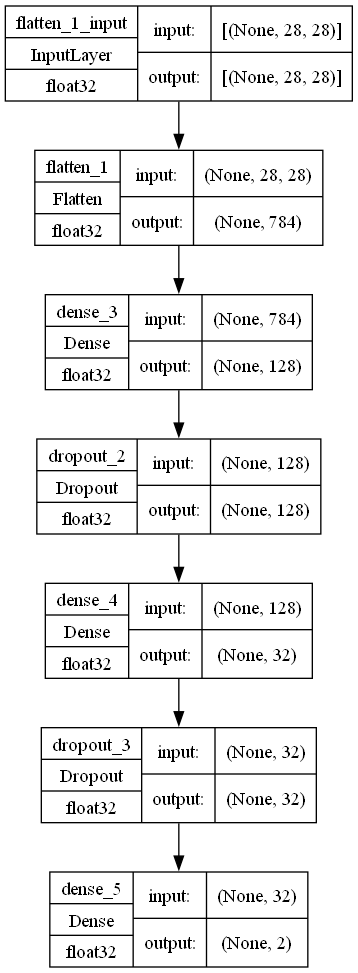

In [14]:
NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2 , activation ='softmax')
])

NN_model.summary()

tf.keras.utils.plot_model(NN_model,show_shapes=True,
    show_dtype=True)

## 7. Compile model

In [7]:
NN_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

NN_model.compile(optimizer=NN_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 8. Train Model

In [8]:
history = NN_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=50, epochs=20)

Epoch 1/20


95/95 [==============================] - 2s 6ms/step - loss: 0.5450 - accuracy: 0.7413 - val_loss: 0.4048 - val_accuracy: 0.7939
Epoch 2/20
95/95 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8307 - val_loss: 0.3079 - val_accuracy: 0.8912
Epoch 3/20
95/95 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.8747 - val_loss: 0.2597 - val_accuracy: 0.8893
Epoch 4/20
95/95 [==============================] - 0s 4ms/step - loss: 0.2906 - accuracy: 0.8919 - val_loss: 0.2185 - val_accuracy: 0.9332
Epoch 5/20
95/95 [==============================] - 0s 4ms/step - loss: 0.2575 - accuracy: 0.9055 - val_loss: 0.2034 - val_accuracy: 0.9275
Epoch 6/20
95/95 [==============================] - 0s 4ms/step - loss: 0.2355 - accuracy: 0.9110 - val_loss: 0.1866 - val_accuracy: 0.9351
Epoch 7/20
95/95 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9161 - val_loss: 0.1742 - val_accuracy: 0.9408
Epoch 8/20
95/95 [

## 9. Plot training and evaluation results

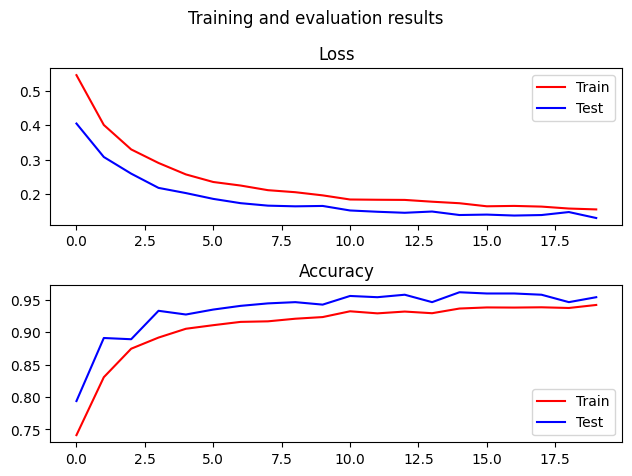

In [9]:
# Loss plot

figure, axis = plt.subplots(2)
line1, = axis[0].plot(history.history['loss'], 'r')
line2, = axis[0].plot(history.history['val_loss'], 'b')
axis[0].legend(['Train','Test'])
axis[0].set_title("Loss")
# Accuracy plot
line3, = axis[1].plot(history.history['accuracy'], 'r')
line4, = axis[1].plot(history.history['val_accuracy'], 'b')
axis[1].legend(['Train','Test'])
axis[1].set_title("Accuracy")
figure.suptitle("Training and evaluation results")
figure.tight_layout(pad=1)

plt.show()

## 10. Run model with test data and plot confusion matrix

20/20 [==============================] - 0s 2ms/step


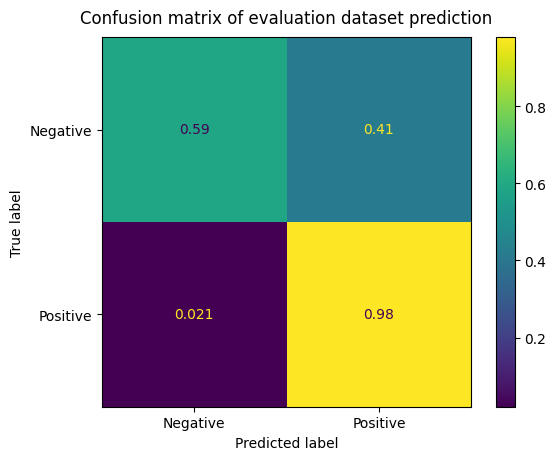

In [10]:
NN_test_prediction = NN_model.predict(test_images)

NN_test_prediction = np.argmax(NN_test_prediction, axis=1)

result = confusion_matrix(test_labels, NN_test_prediction , normalize='true')

cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.title("Confusion matrix of evaluation dataset prediction", pad=10)
plt.show()

## 11. Save model

In [11]:
#NN_model.save("NN_model")

## 12. Find improperly classified images

In [12]:
def getClassifiedImageIndecies (predictions, labels):
  true_negative = []
  true_positive = []
  false_positive = []
  false_negative = []

  for i in range(len(labels)):
    if predictions[i] == labels[i]:
      if labels[i] == 0:
        true_negative.append(i)
      else:
        true_positive.append(i)
    else:
      if labels[i] == 0:
        false_positive.append(i)
      else:
        false_negative.append(i)

  return true_negative, true_positive, false_positive, false_negative

NN_true_negative, NN_true_positive, NN_false_positive, NN_false_negative = getClassifiedImageIndecies(NN_test_prediction, test_labels)


## 13. Display incorrectly and correctly classified images

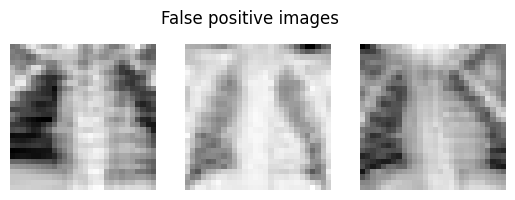

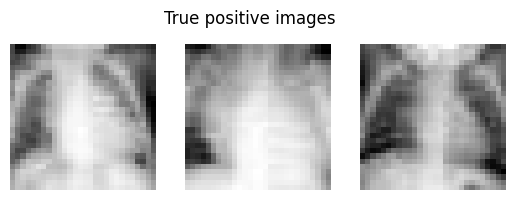

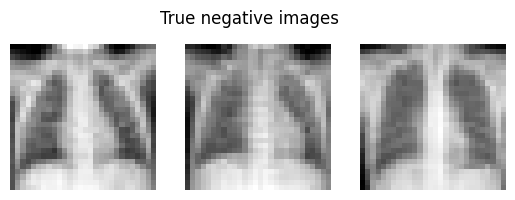

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(test_images[NN_false_positive[0]], cmap="gray")
ax1.axis("off")
ax2.imshow(test_images[NN_false_positive[10]], cmap="gray")
ax2.axis("off")
ax3.imshow(test_images[NN_false_positive[-1]], cmap="gray")
ax3.axis("off")
fig.suptitle('False positive images')
fig.subplots_adjust(top=1.4)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(test_images[NN_true_positive[0]], cmap="gray")
ax1.axis("off")
ax2.imshow(test_images[NN_true_positive[10]], cmap="gray")
ax2.axis("off")
ax3.imshow(test_images[NN_true_positive[-1]], cmap="gray")
ax3.axis("off")
fig.suptitle('True positive images')
fig.subplots_adjust(top=1.4)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(test_images[NN_true_negative[0]], cmap="gray")
ax1.axis("off")
ax2.imshow(test_images[NN_true_negative[10]], cmap="gray")
ax2.axis("off")
ax3.imshow(test_images[NN_true_negative[-1]], cmap="gray")
ax3.axis("off")
fig.suptitle('True negative images')
fig.subplots_adjust(top=1.4)



## 14. Create a convolutional neural network

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 20, 20, 16)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

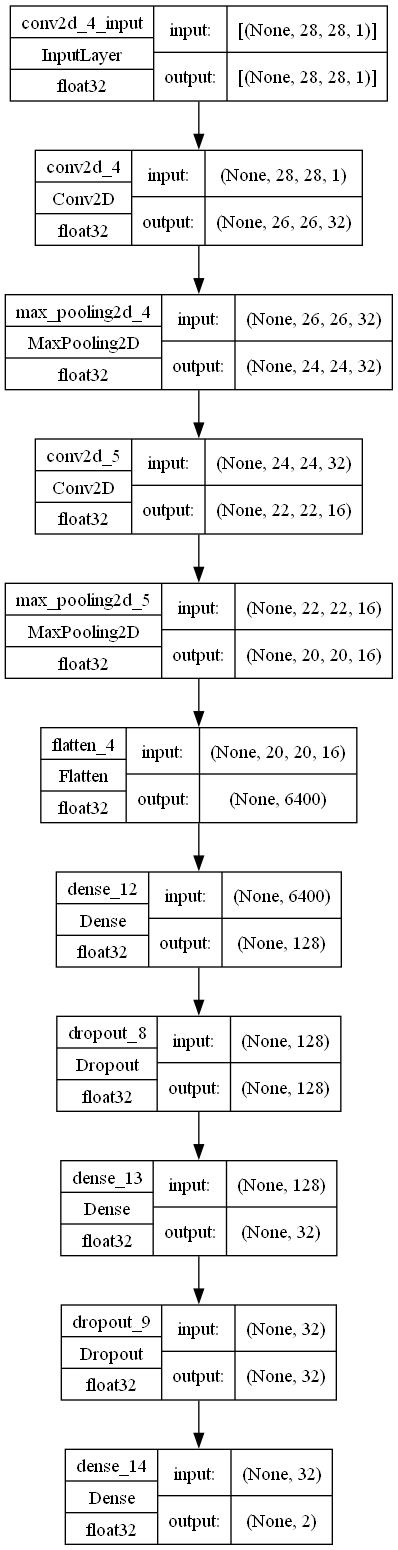

In [17]:
CNN_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size =(3, 3), strides =1, activation ='relu', input_shape = (28,28,1)), 
  tf.keras.layers.MaxPooling2D(pool_size =(3, 3), strides =(1, 1)),
  tf.keras.layers.Conv2D(16, kernel_size =(3, 3), strides =1, activation ='relu'), 
  tf.keras.layers.MaxPooling2D(pool_size =(3, 3), strides =(1, 1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2 , activation ='softmax')
])


CNN_model.summary()

tf.keras.utils.plot_model(CNN_model,show_shapes=True,
    show_dtype=True)